# Homework 1
###### by Mher Movsisyan

### Smart glasses bass model approximation

Smart glasses are the closest thing to smart watches. The bass model approximation will be representative due to this. I've chosen smartwatch sales data from Finland to approximate it.

In [6]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

#
# Data from:
# Gotech. (January 28, 2021). Retail sales of smartphones, smartwatches and mobile phones in Finland from 2016 to 2020, by device category (in million euros) [Graph]. In Statista. 
# Retrieved September 29, 2023, from https://www.statista.com/statistics/702452/smartphones-smartwatches-mobile-phone-retail-sales-in-finland/
#


data = pd.DataFrame({
    "year": np.arange(5) + 2016, 
    "sales": [25.90, 26.60, 35.10, 69.90, 106.10]
})

data["cumulative"] = data["sales"].cumsum()
data

,year,sales,cumulative
0,2016,25.9,25.9
1,2017,26.6,52.5
2,2018,35.1,87.6
3,2019,69.9,157.5
4,2020,106.1,263.6


In [8]:
def bass(x, innovation, imitation, market):
    return (innovation + (imitation/market) * x) * (market - x)

popt, pcov = curve_fit(bass, data.cumulative, data.sales)
popt

array([-2.46517732e-01,  1.93309889e-02, -5.94090467e+01])

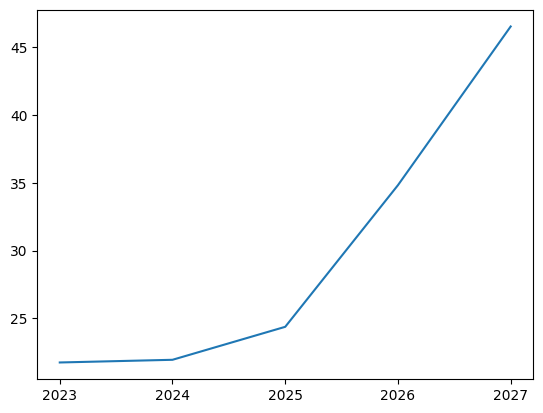

In [14]:
from matplotlib import pyplot as plt
plt.plot((np.arange(5)+2023), bass(data["sales"], *popt))
plt.xticks((np.arange(5)+2023));

Here, we shift the approximation to start at 2023 to match the market timing.